In [1]:
from __init__ import read_from_mongo, read_from_postgre, clubs_columns, competitions_columns
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd

# Read data from MongoDB

In [2]:
players = read_from_mongo("players")
players.head()
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30302 entries, 0 to 30301
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          30302 non-null  object 
 1   first_name                   28337 non-null  object 
 2   last_name                    30302 non-null  object 
 3   last_season                  30302 non-null  object 
 4   player_code                  30302 non-null  object 
 5   country_of_birth             27613 non-null  object 
 6   city_of_birth                28099 non-null  object 
 7   country_of_citizenship       29759 non-null  object 
 8   date_of_birth                30255 non-null  object 
 9   sub_position                 30130 non-null  object 
 10  position                     30302 non-null  object 
 11  foot                         27913 non-null  object 
 12  height_in_cm                 28204 non-null  object 
 13  market_value_in_

In [3]:
appearances = read_from_mongo("appearances")
appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506995 entries, 0 to 1506994
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   _id                     1506995 non-null  object        
 1   game_id                 1506995 non-null  object        
 2   player_id               1506995 non-null  object        
 3   player_club_id          1506995 non-null  int64         
 4   player_current_club_id  1506995 non-null  int64         
 5   date                    1506995 non-null  datetime64[ns]
 6   player_name             1506995 non-null  object        
 7   competition_id          1506995 non-null  object        
 8   yellow_cards            1506995 non-null  int64         
 9   red_cards               1506995 non-null  int64         
 10  goals                   1506995 non-null  int64         
 11  assists                 1506995 non-null  int64         
 12  minutes_played

In [4]:
lineups = read_from_mongo("gamelineups")
lineups.head()

_id                   game_id  club_id  \
0  6574cca60a8453403824e55f  6574baea291260c74de25e9f      338   
1  6574cca60a8453403824e560  6574baea291260c74de25e9f      338   
2  6574cca60a8453403824e561  6574baea291260c74de25e9f      338   
3  6574cca60a8453403824e562  6574baea291260c74de25e9f      338   
4  6574cca60a8453403824e563  6574baea291260c74de25e9f      338   

              type number                 player_id         player_name  \
0  starting_lineup     89  6574baf3975bb4cdf6a05aee  Vladyslav Supryaga   
1  starting_lineup     10  6574baf3975bb4cdf6a05408   Mykola Shaparenko   
2  starting_lineup      5  6574baf3975bb4cdf6a029a3    Sergiy Sydorchuk   
3  starting_lineup     94  6574baf3975bb4cdf6a033c4     Tomasz Kedziora   
4  starting_lineup     16  6574baf3975bb4cdf6a05961   Vitaliy Mykolenko   

   team_captain            position  
0         False      Centre-Forward  
1         False    Central Midfield  
2          True  Defensive Midfield  
3         False          Right-Back  
4         False           Left-Back

In [5]:
games = read_from_mongo("games")
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51642 entries, 0 to 51641
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   _id                  51642 non-null  object        
 1   competition_id       51642 non-null  object        
 2   season               51642 non-null  object        
 3   round                51642 non-null  object        
 4   date                 51642 non-null  datetime64[ns]
 5   home_club_id         51642 non-null  int64         
 6   away_club_id         51642 non-null  int64         
 7   home_club_goals      51642 non-null  int64         
 8   away_club_goals      51642 non-null  int64         
 9   home_club_position   45762 non-null  float64       
 10  away_club_position   45762 non-null  float64       
 11  stadium              51593 non-null  object        
 12  attendance           45065 non-null  float64       
 13  referee              51466 non-

In [6]:
valuations = read_from_mongo("playervaluations")
valuations.head()

_id                 player_id  last_season  \
0  6574cccc0a845340382644f6  6574baf3975bb4cdf6a00793         2013   
1  6574cccc0a845340382644f7  6574baf3975bb4cdf6a00962         2012   
2  6574cccc0a845340382644f8  6574baf3975bb4cdf6a00702         2015   
3  6574cccc0a845340382644f9  6574baf3975bb4cdf6a00703         2017   
4  6574cccc0a845340382644fa  6574baf3975bb4cdf6a00704         2015   

              datetime        date    dateweek  market_value_in_eur  \
0  2003-12-09 00:00:00  2003-12-09  2003-12-08               400000   
1  2003-12-15 00:00:00  2003-12-15  2003-12-15               900000   
2  2004-10-04 00:00:00  2004-10-04  2004-10-04              7000000   
3  2004-10-04 00:00:00  2004-10-04  2004-10-04              1500000   
4  2004-10-04 00:00:00  2004-10-04  2004-10-04              8000000   

   current_club_id player_club_domestic_competition_id               updatedAt  
0              126                                 TR1 2023-12-09 20:36:16.924  
1              984                                 GB1 2023-12-09 20:36:16.924  
2              398                                 IT1 2023-12-09 20:36:16.924  
3               16                                  L1 2023-12-09 20:36:16.924  
4             1091                                 GR1 2023-12-09 20:36:16.924

In [7]:
rooms = read_from_mongo("rooms")

In [8]:
users = read_from_mongo("users")

# Read data from PostgreSQL

In [9]:
clubs = read_from_postgre("clubs")
#assign to clubs columns names the array clubs_columns
clubs.columns = clubs_columns
clubs.head()
clubs.info()
#change the type of the foreigner_percentage column from object to float
clubs["foreigners_percentage"] = clubs["foreigners_percentage"].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      426 non-null    int64  
 1   average_age              388 non-null    object 
 2   club_code                426 non-null    object 
 3   coach_name               0 non-null      object 
 4   domestic_competition_id  426 non-null    object 
 5   foreigners_number        426 non-null    object 
 6   foreigners_percentage    379 non-null    object 
 7   last_season              426 non-null    object 
 8   name                     426 non-null    object 
 9   national_team_players    426 non-null    object 
 10  net_transfer_record      426 non-null    object 
 11  squad_size               426 non-null    object 
 12  stadium_name             426 non-null    object 
 13  stadium_seats            426 non-null    object 
 14  total_market_value       4

In [10]:
competitions = read_from_postgre("competitions")
competitions.columns  = competitions_columns
competitions.head()

competition_code   _id confederation country_id country_name  \
0                      italy-cup   CIT        europa         75        Italy   
1           johan-cruijff-schaal  NLSC        europa        122  Netherlands   
2                kypello-elladas   GRP        europa         56       Greece   
3  supertaca-candido-de-oliveira  POSU        europa        136     Portugal   
4              russian-super-cup  RUSS        europa        141       Russia   

  domestic_league_code                           name            sub_type  \
0                  IT1                      italy-cup        domestic_cup   
1                  NL1           johan-cruijff-schaal  domestic_super_cup   
2                  GR1                kypello-elladas        domestic_cup   
3                  PO1  supertaca-candido-de-oliveira  domestic_super_cup   
4                  RU1              russian-super-cup  domestic_super_cup   

           type                                                url  
0  domestic_cup  https://www.transfermarkt.co.uk/italy-cup/star...  
1         other  https://www.transfermarkt.co.uk/johan-cruijff-...  
2  domestic_cup  https://www.transfermarkt.co.uk/kypello-ellada...  
3         other  https://www.transfermarkt.co.uk/supertaca-cand...  
4         other  https://www.transfermarkt.co.uk/russian-super-...

# Storing in csvs

In [11]:
"""players.to_csv("current_datasets/players.csv")
appearances.to_csv("current_datasets/appearances.csv")
lineups.to_csv("current_datasets/lineups.csv")
games.to_csv("current_datasets/games.csv")
valuations.to_csv("current_datasets/valuations.csv  ")
rooms.to_csv("current_datasets/rooms.csv")
users.to_csv("current_datasets/users.csv")
clubs.to_csv("current_datasets/clubs.csv")
competitions.to_csv("current_datasets/competitions.csv")"""



'players.to_csv("current_datasets/players.csv")\nappearances.to_csv("current_datasets/appearances.csv")\nlineups.to_csv("current_datasets/lineups.csv")\ngames.to_csv("current_datasets/games.csv")\nvaluations.to_csv("current_datasets/valuations.csv  ")\nrooms.to_csv("current_datasets/rooms.csv")\nusers.to_csv("current_datasets/users.csv")\nclubs.to_csv("current_datasets/clubs.csv")\ncompetitions.to_csv("current_datasets/competitions.csv")'

In [12]:
dfs = {
    'players': players,
    'appearances': appearances,
    'lineups': lineups,
    'games': games,
    'valuations': valuations,
    'clubs': clubs,
    'competitions': competitions
}


# Data cleaning

In [13]:
import pandas as pd

# Create a dictionary to hold the dataframes


"""# Display the head of each dataframe
for df_name, df in dfs.items():
    print(f"Head of {df_name}:")
    print(df.head())"""

for df_name, df in dfs.items():
    # Drop 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
    # Drop '__v' column if it exists
    if '__v' in df.columns:
        df.drop('__v', axis=1, inplace=True)
    # Convert 'createdAt' and 'updatedAt' to datetime if they exist
    if 'createdAt' in df.columns:
        df['createdAt'] = pd.to_datetime(df['createdAt'])
    if 'updatedAt' in df.columns:
        df['updatedAt'] = pd.to_datetime(df['updatedAt'])
    # Convert 'date' to datetime if it exists
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
    # Check for missing values
    missing_values = df.isnull().sum()
    print(f'Missing values in {df_name}:')
    print(missing_values[missing_values > 0])
    # Check data types
    print(f'Data types in {df_name}:')
    print(df.dtypes)

Missing values in players:
first_name                      1965
country_of_birth                2689
city_of_birth                   2203
country_of_citizenship           543
date_of_birth                     47
sub_position                     172
foot                            2389
height_in_cm                    2098
market_value_in_eur            10919
highest_market_value_in_eur     1321
contract_expiration_date       11467
agent_name                     15361
dtype: int64
Data types in players:
_id                             object
first_name                      object
last_name                       object
last_season                     object
player_code                     object
country_of_birth                object
city_of_birth                   object
country_of_citizenship          object
date_of_birth                   object
sub_position                    object
position                        object
foot                            object
height_in_cm             

The initial data cleaning has been performed on all dataframes. Here's a summary of the actions taken and findings:

Unnecessary columns such as 'Unnamed: 0' and '__v' have been removed.
Date columns like 'createdAt', 'updatedAt', and 'date' have been converted to datetime format where applicable.
Missing values have been identified in cseveral dataframes. For example, 'games.csv' has missing values in columns like 'home_club_position', 'away_club_position', 'stadium', 'attendance', 'referee', 'home_club_formation', and 'away_club_formation'.
Data types have been checked and are mostly appropriate, though some may require further inspection or conversion, such as converting 'date_of_birth' in 'players.csv' to datetime.
Next steps could include addressing the missing values, either by filling them in with appropriate values or by deciding on a case-by-case basis whether to remove rows or columns with a significant number of missing values. Additionally, we could further clean the data by standardizing text columns, checking for duplicates, and verifying the integrity of IDs and relationships between tables.

## Null values handling

In [14]:

for df_name, df in dfs.items():
    # Check for columns with a high percentage of missing values
    missing_percentage = df.isnull().sum() / len(df) * 100
    
    
    print(f'Missing value percentages in {df_name}:')
    print(missing_percentage[missing_percentage > 0])
    # Drop columns with more than 50% missing values
    columns_to_drop = missing_percentage[missing_percentage > 50].index
    print("Columns to drop")
    print(columns_to_drop)
    df.drop(columns=columns_to_drop, inplace=True)
    # For columns with less than 50% missing, consider imputation
    # For numeric columns, fill with median
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    for col in categorical_cols:
        print(f"fill {col} None values with {df[col].mode().iloc[0]}")
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    # Check final data types
    print(f'Final data types in {df_name}:')
    print(df.dtypes)
    #print all the dfs.head

Missing value percentages in players:
first_name                      6.484720
country_of_birth                8.874002
city_of_birth                   7.270147
country_of_citizenship          1.791961
date_of_birth                   0.155105
sub_position                    0.567619
foot                            7.883968
height_in_cm                    6.923635
market_value_in_eur            36.033925
highest_market_value_in_eur     4.359448
contract_expiration_date       37.842387
agent_name                     50.693024
dtype: float64
Columns to drop
Index(['agent_name'], dtype='object')
fill _id None values with 6574baf3975bb4cdf6a00702
fill first_name None values with David
fill last_name None values with García
fill last_season None values with 2023
fill player_code None values with paulinho
fill country_of_birth None values with France
fill city_of_birth None values with London
fill country_of_citizenship None values with Turkey
fill date_of_birth None values with 1996-01-19
fi

The data types have been checked and missing values have been handled across all dataframes. Here's a summary of the actions taken:

- Columns with more than 50% missing values were dropped from the respective dataframes. For example, 'home_club_formation' and 'away_club_formation' in `games.csv` had over 96% missing values and were removed.
- Numeric columns with missing values were filled with the median of the column.
- Categorical columns with missing values were filled with the mode of the column.
- The 'coach_name' column in `clubs.csv` was dropped due to 100% missing values.

Here are some specific details for a few dataframes:

- `games.csv`: Missing values in 'home_club_position' and 'away_club_position' were around 11.39%, which were filled with the median. The 'attendance' column had 12.74% missing values, also filled with the median.
- `players.csv`: Missing values in 'first_name' and 'height_in_cm' were below 10%, filled with the mode and median respectively. The 'market_value_in_eur' column had 36.03% missing values, filled with the median.
- `competitions.csv`: The 'country_name' and 'domestic_league_code' had 16.28% missing values, which were filled with the mode.

The final data types are appropriate for the analysis, with IDs as objects, numeric values as integers or floats, and dates in datetime format.



## Type coherence checking

In [15]:
# Check and correct data types for each dataframe
for df_name, df in dfs.items():
    # Check current data types
    print(f'Current data types in {df_name}:')
    print(df.dtypes)
    # Correct data types where necessary
    # For IDs, ensure they are strings
    id_cols = [col for col in df.columns if 'id' in col or 'code' in col]
    df[id_cols] = df[id_cols].astype(str)
    # For boolean columns, ensure they are booleans
    bool_cols = [col for col in df.columns if df[col].dtype == 'object' and set(df[col].unique()) <= {'True', 'False'}]
    df[bool_cols] = df[bool_cols].astype(bool)
    # For numeric columns, ensure they are the correct numeric type
    # Convert integers stored as floats to integers
    float_cols = df.select_dtypes(include=['float']).columns
    for col in float_cols:
        if df[col].dropna().apply(float.is_integer).all():
            df[col] = df[col].astype('Int64')
    # Check final data types
    print(f'Final data types in {df_name}:')
    print(df.dtypes)

Current data types in players:
_id                             object
first_name                      object
last_name                       object
last_season                     object
player_code                     object
country_of_birth                object
city_of_birth                   object
country_of_citizenship          object
date_of_birth                   object
sub_position                    object
position                        object
foot                            object
height_in_cm                    object
market_value_in_eur            float64
highest_market_value_in_eur    float64
contract_expiration_date        object
image_url                       object
url                             object
current_club_id                  int64
dtype: object
Final data types in players:
_id                            object
first_name                     object
last_name                      object
last_season                    object
player_code                    ob

The data types across all dataframes have been reviewed and corrected where necessary. Here are some highlights:

- ID and code columns have been converted to strings to ensure consistency.
- Boolean columns have been verified and are correctly typed as booleans.
- Numeric columns that were incorrectly typed as floats but represent integer values have been converted to integers.
For example, in games.csv, home_club_id and away_club_id were converted from integers to strings, and attendance was converted from a float to an integer. Similarly, in players.csv, height_in_cm and market_value_in_eur were converted from floats to integers.

The data types are now coherent with the data they represent, which should facilitate accurate and efficient data analysis moving forward.

In [16]:
dfs['players'].to_csv("current_datasets/players.csv")
dfs['appearances'].head(200).to_csv("current_datasets/appearances.csv")
dfs['lineups'].head(200).to_csv("current_datasets/lineups.csv")
dfs['games'].head(200).to_csv("current_datasets/games.csv")
dfs['valuations'].head(200).to_csv("current_datasets/valuations.csv")
dfs['clubs'].to_csv("current_datasets/clubs.csv")
dfs['competitions'].to_csv("current_datasets/competitions.csv")



# Data Analysis

## Clubs performances

Here's the head of the team performance dataframe showing the total games, home wins, home losses, and home draws for each club

In [17]:
import pandas as pd
from tqdm.notebook import tqdm

games_df = dfs['games']

# Convert date to datetime and sort the games dataframe by date
games_df['date'] = pd.to_datetime(games_df['date'])
games_df.sort_values('date', inplace=True)

# Calculate total games, wins, draws, and losses for each club
team_performance = games_df.groupby('home_club_id').agg(
    total_games=('date', 'count'),
    home_wins=('home_club_goals', lambda x: (x > games_df.loc[x.index, 'away_club_goals']).sum()),
    home_losses=('home_club_goals', lambda x: (x < games_df.loc[x.index, 'away_club_goals']).sum()),
    home_draws=('home_club_goals', lambda x: (x == games_df.loc[x.index, 'away_club_goals']).sum())
).reset_index()

# Rename columns for clarity
team_performance.rename(columns={'home_club_id': 'club_id'}, inplace=True)

# Display the head of the team performance dataframe
team_performance.head()

club_id  total_games  home_wins  home_losses  home_draws
0      10           47         14           21          12
1    1003          194         94           60          40
2    1005           47         11           21          15
3    1010          118         41           50          27
4    1025          207         76           73          58

This table provides a summary of each club's performance in home games

# Data Visualization

    home_club_id  home_games  home_wins  home_losses  home_draws
0             10          47         14           21          12
1           1003         194         94           60          40
2           1005          47         11           21          15
3           1010         118         41           50          27
4           1025         207         76           73          58
..           ...         ...        ...          ...         ...
421          985         292        184           51          57
422          987         212         84           89          39
423          989         133         45           56          32
424          993          28          5           16           7
425          995         195         75           66          54

[426 rows x 5 columns]
    club_id  home_games  home_wins  home_losses  home_draws  away_games  \
91       27         271        213           24          34         279   
162     583         266        200           2

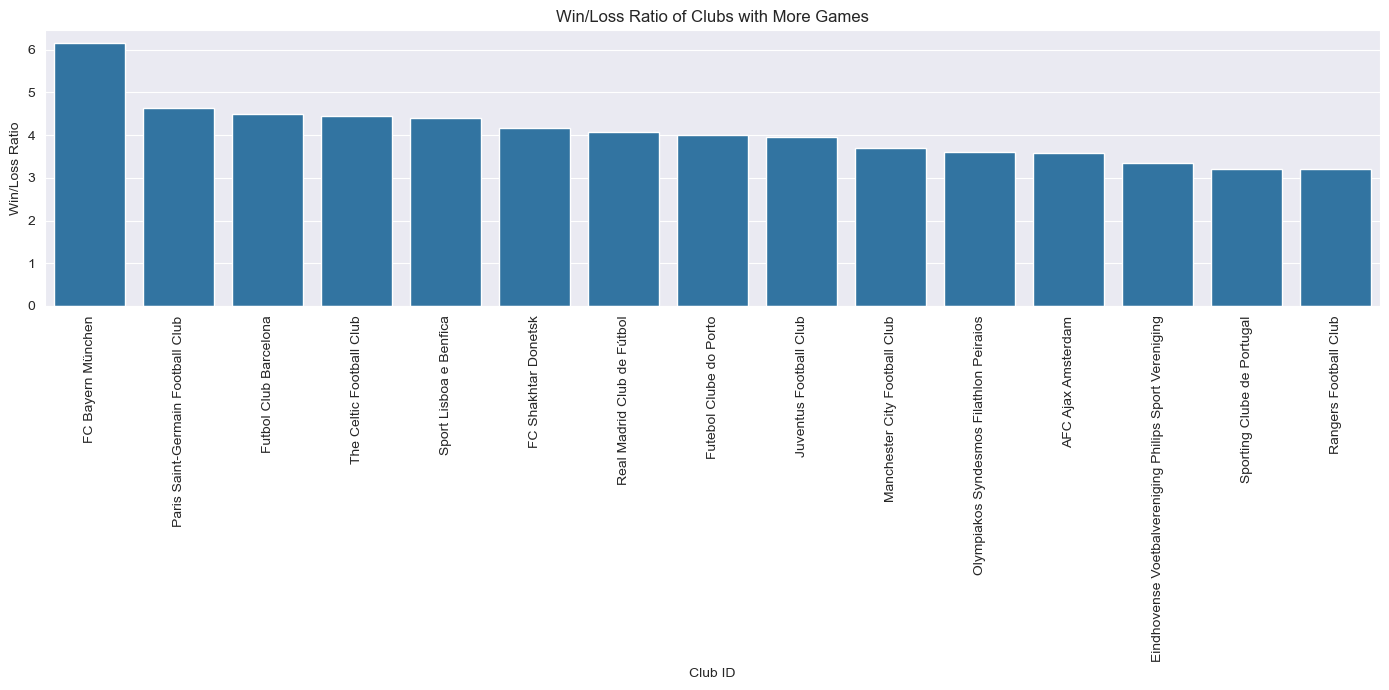

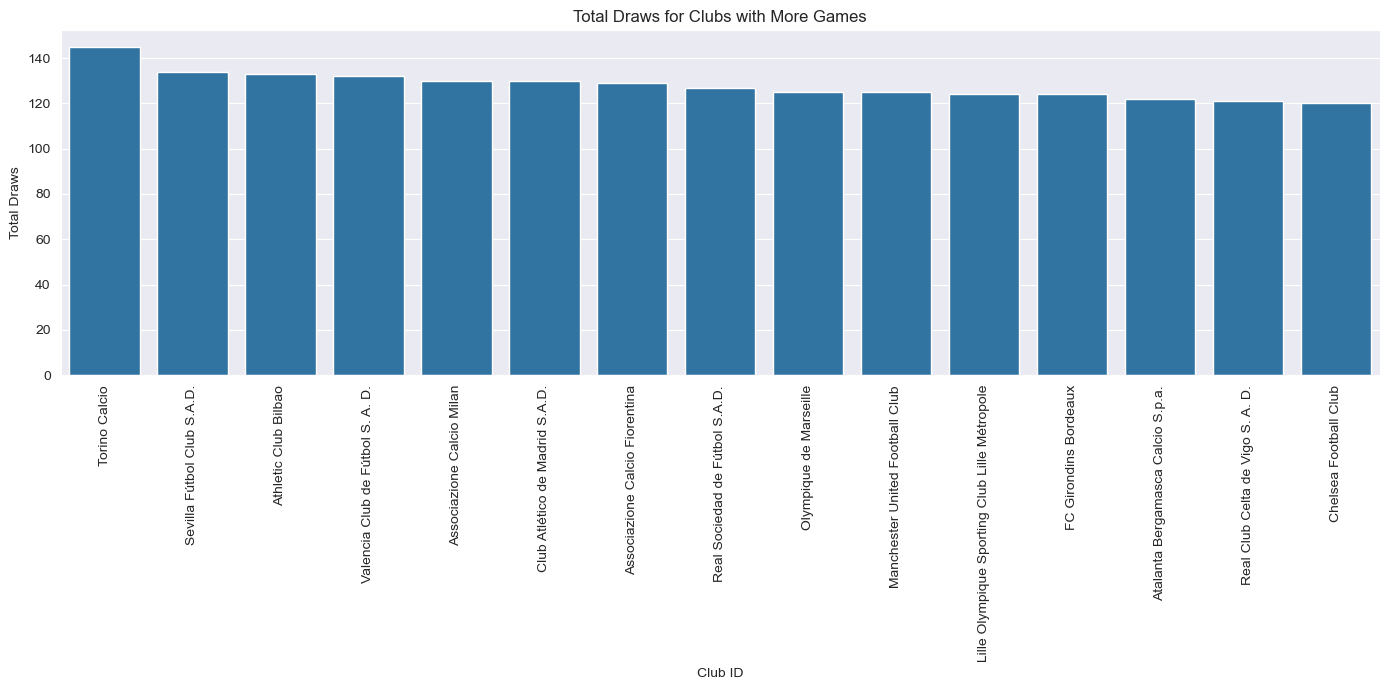

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the games data
games_df = dfs['games']

# Calculate total games, wins, draws, and losses for each club including away games
team_performance_home = games_df.groupby('home_club_id').agg(
    home_games=('date', 'count'),
    home_wins=('home_club_goals', lambda x: (x > games_df.loc[x.index, 'away_club_goals']).sum()),
    home_losses=('home_club_goals', lambda x: (x < games_df.loc[x.index, 'away_club_goals']).sum()),
    home_draws=('home_club_goals', lambda x: (x == games_df.loc[x.index, 'away_club_goals']).sum())
).reset_index()

print(team_performance_home)

team_performance_away = games_df.groupby('away_club_id').agg(
    away_games=('date', 'count'),
    away_wins=('away_club_goals', lambda x: (x > games_df.loc[x.index, 'home_club_goals']).sum()),
    away_losses=('away_club_goals', lambda x: (x < games_df.loc[x.index, 'home_club_goals']).sum()),
    away_draws=('away_club_goals', lambda x: (x == games_df.loc[x.index, 'home_club_goals']).sum())
).reset_index()

# Rename columns for clarity
team_performance_home.rename(columns={'home_club_id': 'club_id'}, inplace=True)
team_performance_away.rename(columns={'away_club_id': 'club_id'}, inplace=True)

# Merge the home and away performance dataframes
team_performance_combined = pd.merge(team_performance_home, team_performance_away, on='club_id', how='outer')

# Calculate total games, wins, draws, and losses
team_performance_combined['total_games'] = team_performance_combined['home_games'].fillna(0) + team_performance_combined['away_games'].fillna(0)
team_performance_combined['total_wins'] = team_performance_combined['home_wins'].fillna(0) + team_performance_combined['away_wins'].fillna(0)
team_performance_combined['total_losses'] = team_performance_combined['home_losses'].fillna(0) + team_performance_combined['away_losses'].fillna(0)
team_performance_combined['total_draws'] = team_performance_combined['home_draws'].fillna(0) + team_performance_combined['away_draws'].fillna(0)

# Calculate win/loss ratio
team_performance_combined['win_loss_ratio'] = team_performance_combined['total_wins'] / team_performance_combined['total_losses']

# Filter the dataframe for clubs with a higher number of total games to reduce the number of clubs
filtered_team_performance = team_performance_combined[team_performance_combined['total_games'] > team_performance_combined['total_games'].median()]

#!!!adding club_name column
clubs_df = dfs['clubs']
filtered_team_performance = pd.merge(filtered_team_performance, clubs_df[['_id', 'name']], left_on='club_id', right_on='_id', how='left')


# Plotting the total wins and losses for the filtered clubs
plt.figure(figsize=(14, 7))
print(filtered_team_performance.sort_values('win_loss_ratio', ascending=False).head(15).sort_values('win_loss_ratio', ascending=False))
sns.barplot(x='name', y='win_loss_ratio', data=filtered_team_performance.sort_values('win_loss_ratio', ascending=False).head(15).sort_values('win_loss_ratio', ascending=False))
plt.title('Win/Loss Ratio of Clubs with More Games')
plt.xlabel('Club ID')
plt.ylabel('Win/Loss Ratio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('win_loss_ratio_filtered.png')
plt.show()

# Plotting the total draws for the filtered clubs
plt.figure(figsize=(14, 7))
sns.barplot(x='name', y='total_draws', data=filtered_team_performance.sort_values('total_draws', ascending=False).head(15))
plt.title('Total Draws for Clubs with More Games')
plt.xlabel('Club ID')
plt.ylabel('Total Draws')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('total_draws_filtered.png')
plt.show()


                        _id first_name   last_name last_season  \
0  6574baf3975bb4cdf6a0071b       Timo  Hildebrand        2014   
1  6574baf3975bb4cdf6a0071d     Martin      Petrov        2012   
2  6574baf3975bb4cdf6a0073a     Martin     Amedick        2012   
3  6574baf3975bb4cdf6a007a2   Jermaine     Pennant        2013   
4  6574baf3975bb4cdf6a007ad     Damien        Duff        2013   

        player_code country_of_birth city_of_birth country_of_citizenship  \
0   timo-hildebrand          Germany         Worms                Germany   
1     martin-petrov         Bulgaria        Vratsa               Bulgaria   
2    martin-amedick          Germany     Paderborn                Germany   
3  jermaine-pennant          England    Nottingham                England   
4       damien-duff          Ireland    Ballyboden                Ireland   

  date_of_birth    sub_position    position   foot height_in_cm  \
0    1979-04-05      Goalkeeper  Goalkeeper  right          180   
1    1

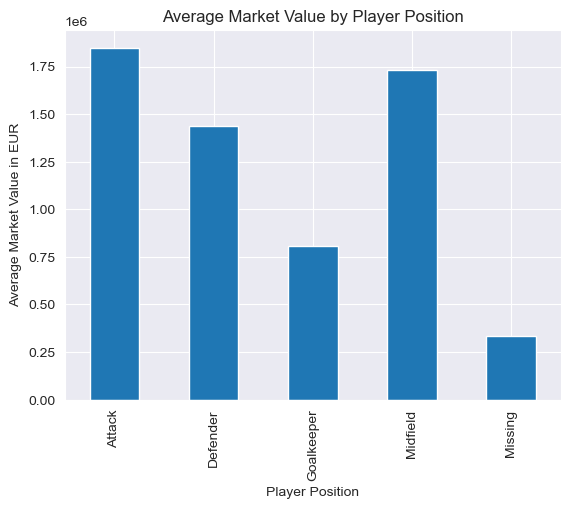

In [19]:

player_df = dfs['players']
print(player_df.head())
average_values = player_df.groupby('position')['market_value_in_eur'].mean()
# Step 3: Plot the results
average_values.plot(kind='bar')
plt.xlabel('Player Position')
plt.ylabel('Average Market Value in EUR')
plt.title('Average Market Value by Player Position')
plt.show()

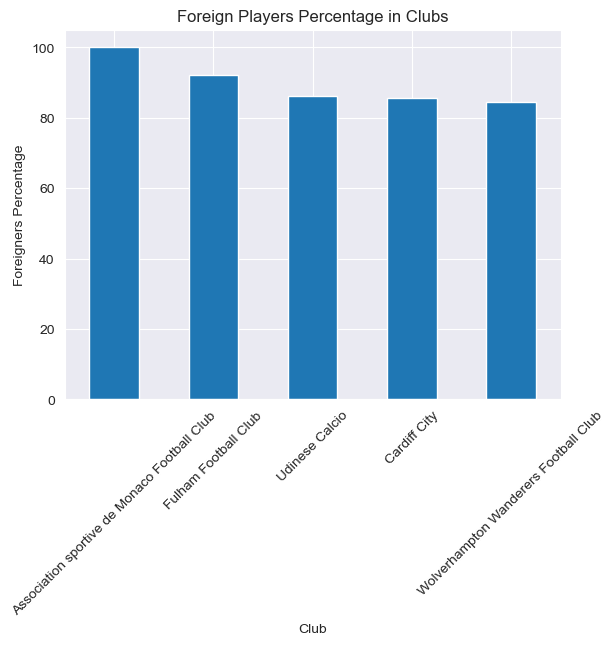

In [20]:
# strangers percentage for each club
clubs_df = dfs['clubs']
#column is foreigners_percentage
selected_clubs = clubs_df.sort_values("foreigners_percentage", ascending=False)[['name', 'foreigners_percentage']].iloc[0:5]

# Step 3: Plot the data
selected_clubs.set_index('name').plot(kind='bar', y='foreigners_percentage', legend=False)
plt.xlabel('Club')
plt.ylabel('Foreigners Percentage')
plt.title('Foreign Players Percentage in Clubs')
plt.xticks(rotation=45)
plt.show()

# Some notaionality analysis

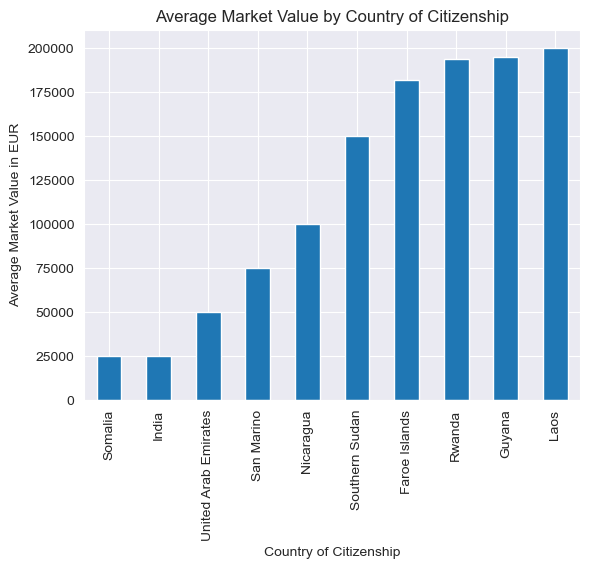

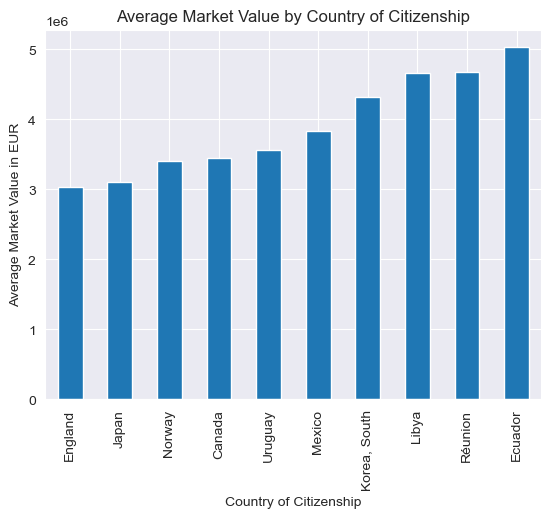

/var/folders/q6/bw_h2w9d6js7mn__0srnx8rm0000gn/T/ipykernel_4077/671020690.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


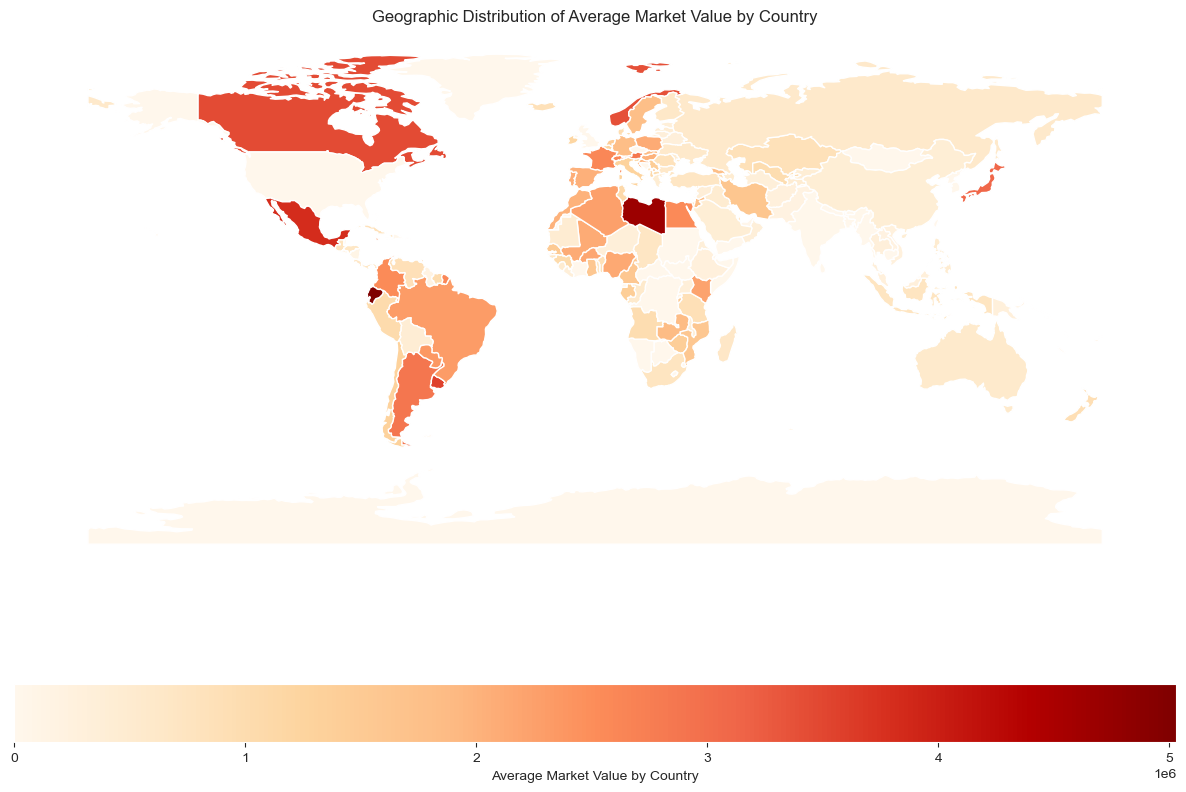

In [21]:
# I want to see the avarage market value of players grouped by country_of_citizenship
# Step 1: Group the data
player_df = dfs['players']
average_values = player_df.groupby('country_of_citizenship')['market_value_in_eur'].mean()

# Step 2: Plot the results
#one chart only for the first 10 countries and on chart the last 10 countries

average_values.sort_values(ascending=True).iloc[0:10].plot(kind='bar')
plt.xlabel('Country of Citizenship')
plt.ylabel('Average Market Value in EUR')
plt.title('Average Market Value by Country of Citizenship')
plt.show()

average_values.sort_values(ascending=True).iloc[-10:].plot(kind='bar')
plt.xlabel('Country of Citizenship')
plt.ylabel('Average Market Value in EUR')
plt.title('Average Market Value by Country of Citizenship')
plt.show()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging club counts with world geometry
world_clubs = world.merge(average_values, left_on='name', right_on='country_of_citizenship', how='left')

world_clubs['market_value_in_eur'] = world_clubs['market_value_in_eur'].fillna(0)  # Fill missing values with 0

# Convert market_value_in_eur to float
world_clubs['market_value_in_eur'] = world_clubs['market_value_in_eur'].astype(float)

# Now, plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_clubs.plot(column='market_value_in_eur', ax=ax, cmap='OrRd', legend=True, legend_kwds={'label': "Average Market Value by Country", 'orientation': "horizontal"})
ax.set_title('Geographic Distribution of Average Market Value by Country')
ax.set_axis_off()
plt.show()



## Stadium performances

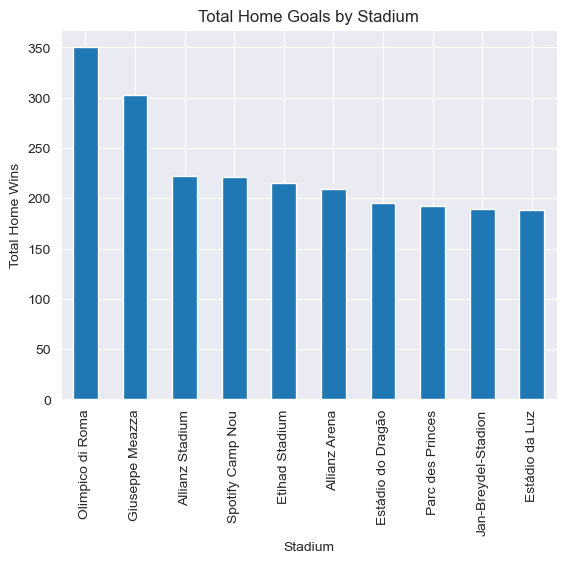

In [22]:
#Stadium names with most home games won
games_df = dfs['games']
# Step 1: Group the data
stadiums = games_df.query("home_club_goals > away_club_goals").groupby('stadium')['_id'].count()
# Step 2: Plot the results
stadiums.sort_values(ascending=False).iloc[0:10].plot(kind='bar')
plt.xlabel('Stadium')
plt.ylabel('Total Home Wins')
plt.title('Total Home Goals by Stadium')
plt.show()



# Simple performance-age analysis

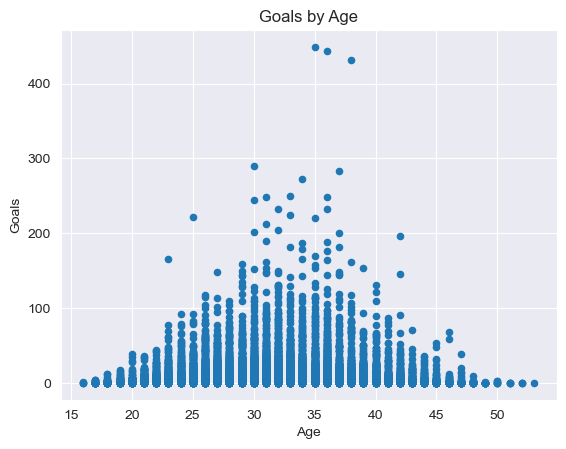

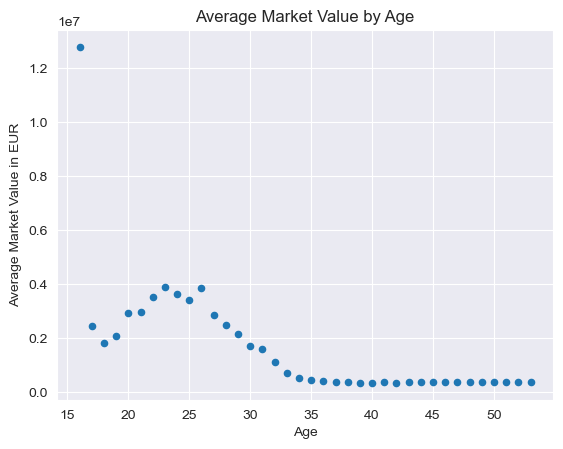

In [23]:
#I want to visualize the correlation between the age of the player and the number of goals
# Step 1: Group the data
player_df = dfs['players']
player_df['date_of_birth'] = pd.to_datetime(player_df['date_of_birth'])
player_df['age'] = ((pd.to_datetime('today') - player_df['date_of_birth']).dt.days / 365.25).astype(int)
#the goals are in the appaerances df
appearances_df = dfs['appearances']
appearances_df = appearances_df.groupby('player_id')['goals'].sum()
# Step 2: Plot the results
player_df = pd.merge(player_df, appearances_df,left_on="_id" ,right_on='player_id', how='inner')
player_df.head()
player_df.plot(kind='scatter', x='age', y='goals')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.title('Goals by Age')
plt.show()

market_value_for_age = player_df.groupby('age')['market_value_in_eur'].mean()
# Convert the Series to a DataFrame
market_value_for_age_df = market_value_for_age.reset_index()

# Plot the DataFrame
market_value_for_age_df.plot(kind='scatter', x='age', y='market_value_in_eur')
plt.xlabel('Age')
plt.ylabel('Average Market Value in EUR')
plt.title('Average Market Value by Age')
plt.show()


The carts above show that the average market value of players is higher at the age between 20 and 25, and then, near the age of 35 it become flat. While the distribution of the goals by age is like a normal distribution, with the peak at the age around 33.

# Foreign Players distribution in Football Clubs

In [24]:
players_df = dfs['players']
clubs_df = dfs['clubs']
players_clubs_merged = pd.merge(players_df, clubs_df, left_on='current_club_id', right_on='_id', how='left')

# Count the number of players from each country in each club
nationality_distribution = players_clubs_merged.groupby(['club_code', 'country_of_citizenship']).size().reset_index(name='count')

# Selecting a few clubs for visualization
selected_clubs = nationality_distribution['club_code'].unique()[:20]
selected_data = nationality_distribution[nationality_distribution['club_code'].isin(selected_clubs)]



/var/folders/q6/bw_h2w9d6js7mn__0srnx8rm0000gn/T/ipykernel_4077/2382263178.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


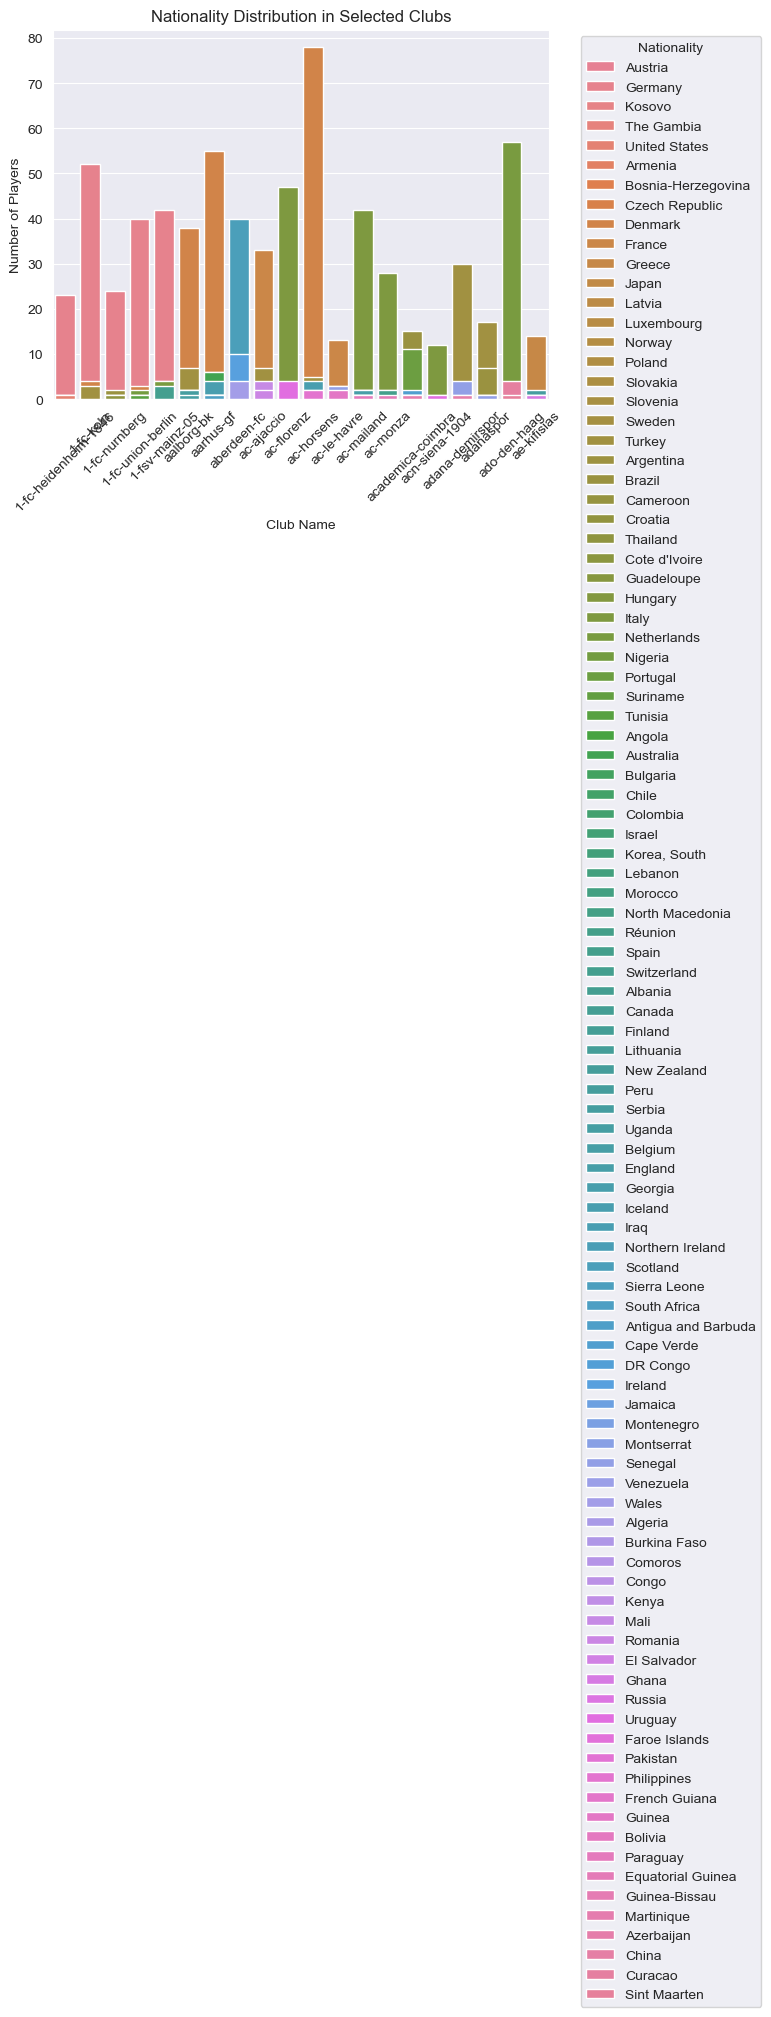

In [25]:

# Creating the bar chart for nationality distribution
sns.barplot(x='club_code', y='count', hue='country_of_citizenship', data=selected_data, dodge=False)
plt.title('Nationality Distribution in Selected Clubs')
plt.xlabel('Club Name')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.legend(title='Nationality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Let's see where are clubs in the world

/var/folders/q6/bw_h2w9d6js7mn__0srnx8rm0000gn/T/ipykernel_4077/3247646551.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


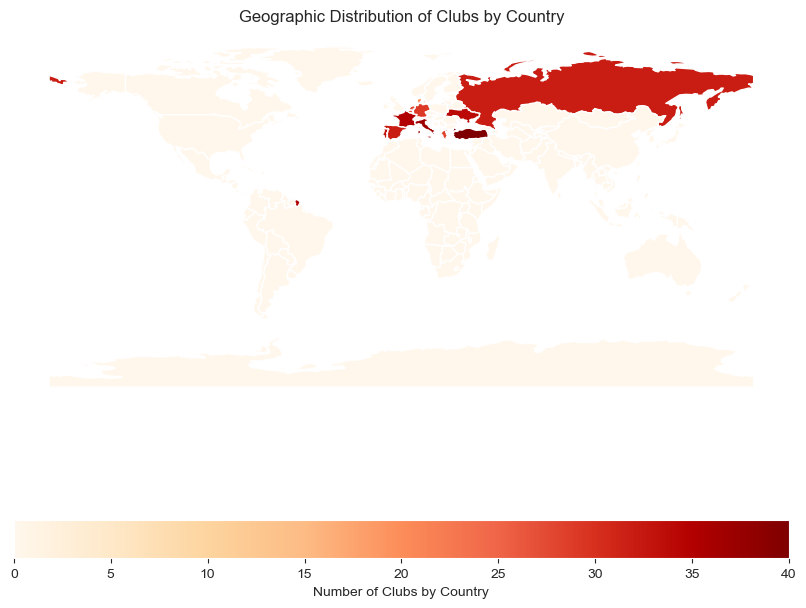

In [26]:
# Merge Competitions with Clubs

competitions_df = dfs['competitions']


competitions_clubs_merged = pd.merge(clubs_df, competitions_df[['country_name', '_id']], left_on='domestic_competition_id', right_on='_id', how='left')

# Counting the number of clubs in each country
club_country_counts = competitions_clubs_merged.groupby('country_name').count().reset_index()[['country_name', 'name']]

# Renaming the columns
club_country_counts.columns = ['country', 'num_clubs']

# World map for base
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging club counts with world geometry
world_clubs = world.merge(club_country_counts, left_on='name', right_on='country', how='left')
world_clubs['num_clubs'] = world_clubs['num_clubs'].fillna(0)  # Fill missing values with 0

# Plotting the world map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
world_clubs.plot(column='num_clubs', ax=ax, cmap='OrRd', legend=True, legend_kwds={'label': "Number of Clubs by Country", 'orientation': "horizontal"})
ax.set_title('Geographic Distribution of Clubs by Country')
ax.set_axis_off()
plt.show()


# Correlation market value, age and player stats

Index(['_id_x', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       '_id_y', 'first_name', 'last_name', 'last_season', 'player_code',
       'country_of_birth', 'city_of_birth', 'country_of_citizenship',
       'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm',
       'market_value_in_eur_x', 'highest_market_value_in_eur',
       'contract_expiration_date', 'image_url', 'url', 'current_club_id',
       'age', 'year', 'market_value_in_eur_y'],
      dtype='object')


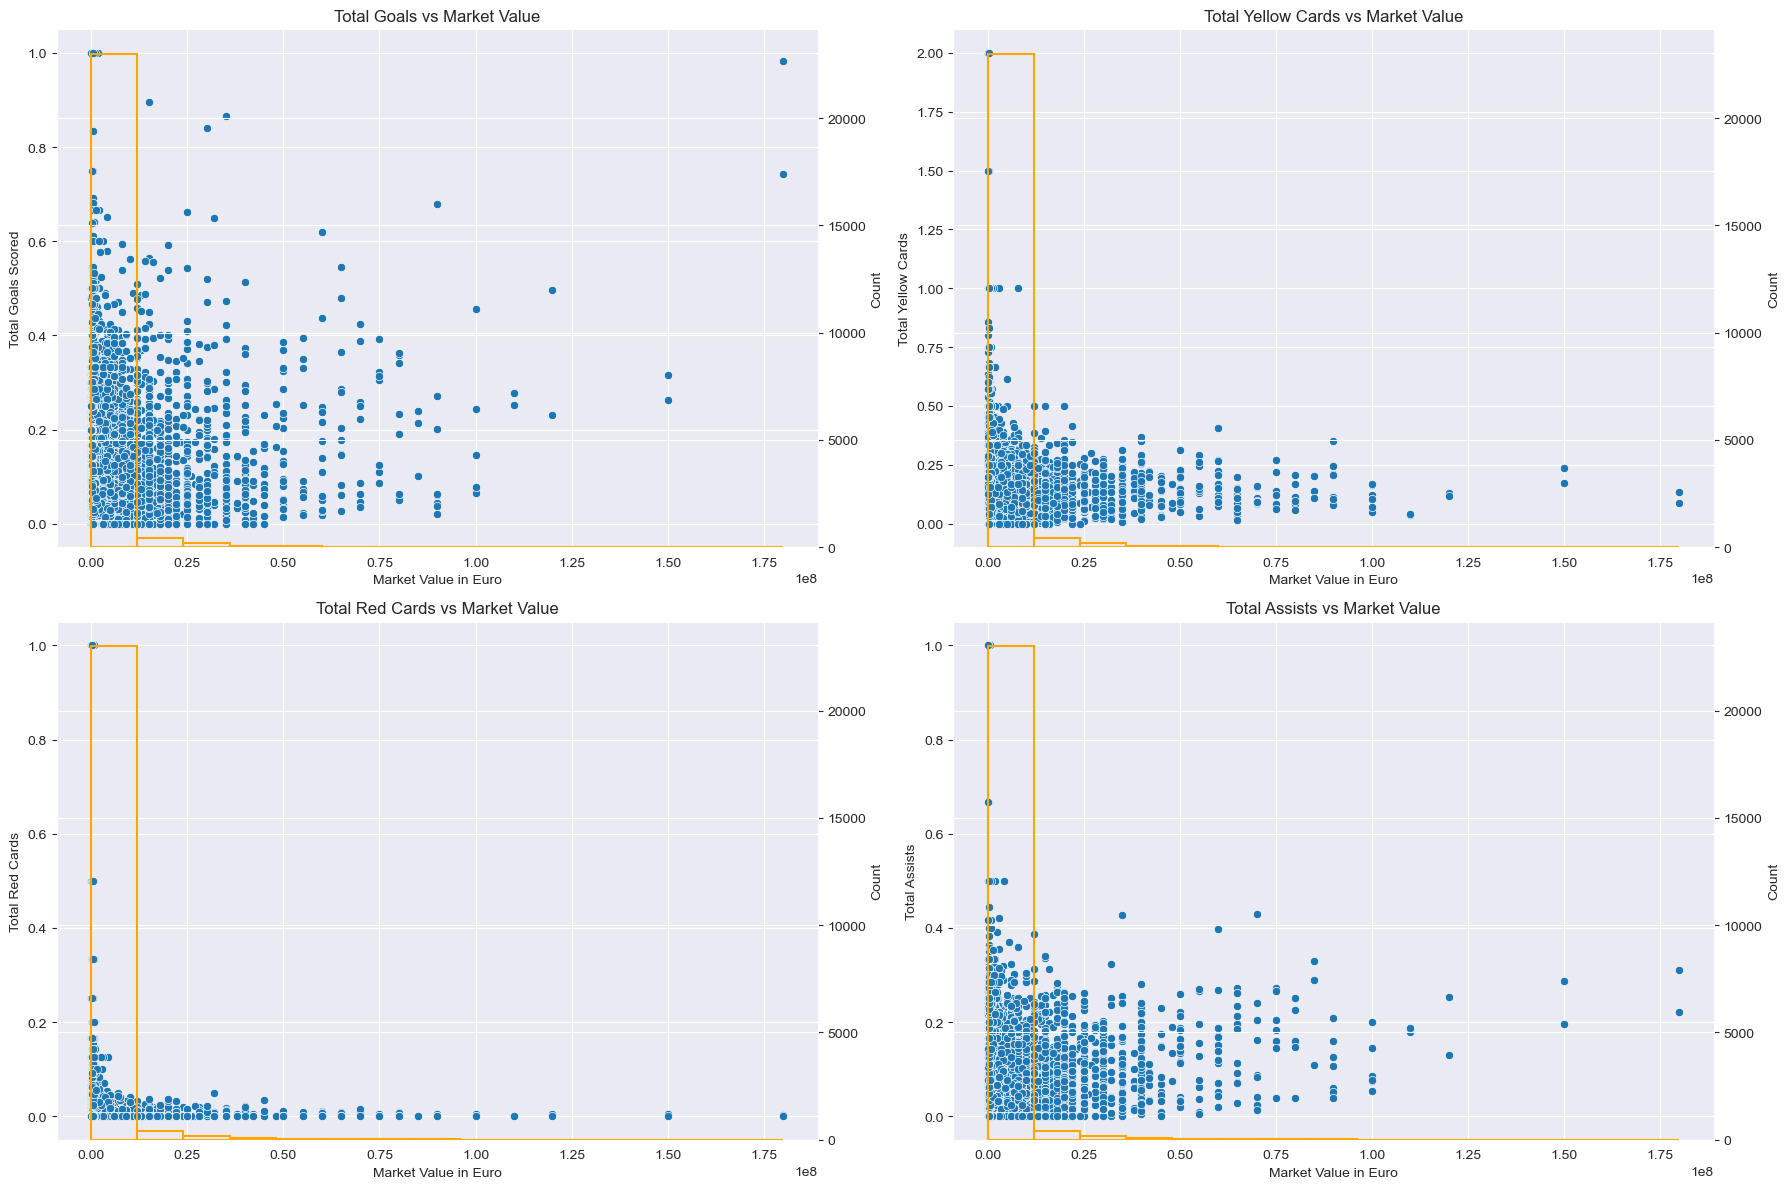

In [27]:
# Preparing the data for scatter plots
# Merging Appearances with Players
players_df = dfs['players']
appearances_df = dfs['appearances']
valuations_df = dfs['valuations']
appearances_players_merged = pd.merge(appearances_df, players_df, left_on='player_id', right_on='_id', how='left')

# Extracting the year from the date column in Appearances (if needed for future use)
appearances_players_merged['year'] = pd.to_datetime(appearances_players_merged['date']).dt.year

# Merging with Valuations
latest_valuations = valuations_df.sort_values(by='datetime', ascending=False).drop_duplicates('player_id')
appearances_players_valuations = pd.merge(appearances_players_merged, latest_valuations[['player_id', 'market_value_in_eur']], on='player_id', how='left')

# Check the column names after merge
print(appearances_players_valuations.columns)

# Assuming 'market_value_in_eur_x' is the correct column
# If 'market_value_in_eur_y' is the correct one, replace '_x' with '_y' in the following code

# Aggregating player stats
player_stats = appearances_players_valuations.groupby('player_id').agg(
    total_goals=pd.NamedAgg(column='goals', aggfunc='sum'),
    total_yellow_cards=pd.NamedAgg(column='yellow_cards', aggfunc='sum'),
    total_red_cards=pd.NamedAgg(column='red_cards', aggfunc='sum'),
    total_assists=pd.NamedAgg(column='assists', aggfunc='sum'),
    market_value_in_eur=pd.NamedAgg(column='market_value_in_eur_x', aggfunc='mean'),  # Use the correct column here
    total_games=pd.NamedAgg(column='game_id', aggfunc='count')
).reset_index()


#divide the stats by the number of games
player_stats['total_goals'] = player_stats['total_goals'] / player_stats['total_games']
player_stats['total_yellow_cards'] = player_stats['total_yellow_cards'] / player_stats['total_games']
player_stats['total_red_cards'] = player_stats['total_red_cards'] / player_stats['total_games']
player_stats['total_assists'] = player_stats['total_assists'] / player_stats['total_games']


fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Scatter plot for Goals vs Market Value
sns.scatterplot(data=player_stats, x='market_value_in_eur', y='total_goals', ax=axes[0, 0])
sns.histplot(player_stats['market_value_in_eur'], bins=15, ax=axes[0, 0].twinx(), fill=False, color='orange')
axes[0, 0].set_title('Total Goals vs Market Value')
axes[0, 0].set_xlabel('Market Value in Euro')
axes[0, 0].set_ylabel('Total Goals Scored')

# Scatter plot for Yellow Cards vs Market Value
sns.scatterplot(data=player_stats, x='market_value_in_eur', y='total_yellow_cards', ax=axes[0, 1])
sns.histplot(player_stats['market_value_in_eur'], bins=15, ax=axes[0, 1].twinx(), fill=False, color='orange')
axes[0, 1].set_title('Total Yellow Cards vs Market Value')
axes[0, 1].set_xlabel('Market Value in Euro')
axes[0, 1].set_ylabel('Total Yellow Cards')

# Scatter plot for Red Cards vs Market Value
sns.scatterplot(data=player_stats, x='market_value_in_eur', y='total_red_cards', ax=axes[1, 0])
sns.histplot(player_stats['market_value_in_eur'], bins=15, ax=axes[1, 0].twinx(), fill=False, color='orange')
axes[1, 0].set_title('Total Red Cards vs Market Value')
axes[1, 0].set_xlabel('Market Value in Euro')
axes[1, 0].set_ylabel('Total Red Cards')

# Scatter plot for Assists vs Market Value
sns.scatterplot(data=player_stats, x='market_value_in_eur', y='total_assists', ax=axes[1, 1])
sns.histplot(player_stats['market_value_in_eur'], bins=15, ax=axes[1, 1].twinx(), fill=False, color='orange')
axes[1, 1].set_title('Total Assists vs Market Value')
axes[1, 1].set_xlabel('Market Value in Euro')
axes[1, 1].set_ylabel('Total Assists')

plt.tight_layout()
plt.show()

We can see that the only correlation between marke value and stats is:
- there is no expensive player with a lot of red cards
- there is no expensive player with a lot of yellow cards
Let's see if we can find some correlation between age, market value and stats with a 3D plot

In [28]:
from datetime import datetime
import plotly.express as px
player_df = dfs['players']
appearances_df = dfs['appearances']
valuations_df = dfs['valuations']

print(valuations_df.columns)

players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
players_df['age'] = datetime.now().year - players_df['date_of_birth'].dt.year

player_df['age'] = players_df['age'].astype(int)

# Merge players with appearances
merged_df = pd.merge(players_df, appearances_df, left_on='_id', right_on='player_id')

# Aggregate data for each player
aggregated_data = merged_df.groupby('player_id').agg(
    age=pd.NamedAgg(column='age', aggfunc='first'),
    market_value_in_eur=pd.NamedAgg(column='market_value_in_eur', aggfunc='first'),
    total_goals=pd.NamedAgg(column='goals', aggfunc='sum')
).reset_index()

# Create a 3D scatter plot
fig = px.scatter_3d(aggregated_data, x='age', y='total_goals', z='market_value_in_eur', 
                    color='market_value_in_eur', 
                    title='Correlation between Age, Market Value, and Goals', height=700)
fig.show()

Index(['_id', 'player_id', 'last_season', 'datetime', 'date', 'dateweek',
       'market_value_in_eur', 'current_club_id',
       'player_club_domestic_competition_id', 'updatedAt'],
      dtype='object')


The plot confimed that there are more correlation between age and stats than between market value and stats, so let's plot the ongoing correlation between age and stats and between market value and stats for each year

First of all let's obtain the information about players, their appearances and their valuations for each year
Because the resulting data may be too big, we will consider only the half of the competitions and we will take the data only over the year 2016

In [29]:
%matplotlib widget
import ipywidgets as widgets

from datetime import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import display

players_df = dfs['players']
games_df = dfs['games']
competitions_df = dfs['competitions']

#add age column
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
players_df['age'] = datetime.now().year - players_df['date_of_birth'].dt.year

appearances_df = dfs['appearances']
valuations_df = dfs['valuations']

# Merging Appearances with Players
# Convert date columns to datetime and extract year
appearances_df['year'] = pd.to_datetime(appearances_df['date']).dt.year
valuations_df['year'] = pd.to_datetime(valuations_df['datetime']).dt.year

# Merge datasets
merged_df = pd.merge(appearances_df, players_df, left_on='player_id', right_on='_id')
merged_df = pd.merge(merged_df, valuations_df, on=['player_id', 'year'])
merged_df = merged_df.query('year >= 2016')

# Get only data for the half of competition_ids
competition_ids = competitions_df['_id'].unique()
competition_ids = competition_ids[:int(len(competition_ids) / 2)]

# Filter data for the selected competition_ids
merged_df = merged_df[merged_df['competition_id'].isin(competition_ids)]

# By Market value
This is the criteria we will use to plot the data using the market value correlation with the stats

In [30]:
def plot_stats_for_specific_year_mkt_val(year):
    # Filter data for the specified year
    year_data = merged_df[merged_df['year'] == year]

    # Aggregate data
    aggregated_data = year_data.groupby(['player_id']).agg(
        total_goals=pd.NamedAgg(column='goals', aggfunc='sum'),
        total_yellow_cards=pd.NamedAgg(column='yellow_cards', aggfunc='sum'),
        total_red_cards=pd.NamedAgg(column='red_cards', aggfunc='sum'),
        total_assists=pd.NamedAgg(column='assists', aggfunc='sum'),
    ).reset_index()
    
    #add age column merging with players_df
    aggregated_data = pd.merge(aggregated_data, players_df[['_id', 'age','market_value_in_eur']], left_on='player_id', right_on='_id', how='left')

    # Metrics to plot
    metrics = {
        'total_goals': 'Total Goals',
        'total_assists': 'Total Assists',
        'total_yellow_cards': 'Total Yellow Cards',
        'total_red_cards': 'Total Red Cards'
    }

    # Create subplots
    fig = make_subplots(rows=2, cols=2, subplot_titles=[metrics[key] for key in metrics.keys()])

    # Add scatter plots to subplots
    row_col_pairs = [(1, 1), (1, 2), (2, 1), (2, 2)]
    for i, (metric, title) in enumerate(metrics.items()):
        fig.add_trace(go.Scatter(x=aggregated_data['market_value_in_eur'], y=aggregated_data[metric], mode='markers', name=title), row=row_col_pairs[i][0], col=row_col_pairs[i][1])

    # Update layout
    fig.update_layout(height=600, width=800, title_text=f'Player Performance Metrics vs Market Value in {year}')
    fig.show()

# By market value pondered

In [31]:
def plot_stats_for_specific_year_mkt_val_pondered(year):
    # Filter data for the specified year
    year_data = merged_df[merged_df['year'] == year]

    # Aggregate data
    aggregated_data = year_data.groupby(['player_id']).agg(
        total_goals=pd.NamedAgg(column='goals', aggfunc='sum'),
        total_yellow_cards=pd.NamedAgg(column='yellow_cards', aggfunc='sum'),
        total_red_cards=pd.NamedAgg(column='red_cards', aggfunc='sum'),
        total_assists=pd.NamedAgg(column='assists', aggfunc='sum'),
        total_games=pd.NamedAgg(column='game_id', aggfunc='count'),
    ).reset_index()
    
    aggregated_data['total_goals'] = aggregated_data['total_goals'] / aggregated_data['total_games']
    aggregated_data['total_yellow_cards'] = aggregated_data['total_yellow_cards'] / aggregated_data['total_games']
    aggregated_data['total_red_cards'] = aggregated_data['total_red_cards'] / aggregated_data['total_games']
    aggregated_data['total_assists'] = aggregated_data['total_assists'] / aggregated_data['total_games']
    
    
    #add age column merging with players_df
    aggregated_data = pd.merge(aggregated_data, players_df[['_id', 'age','market_value_in_eur']], left_on='player_id', right_on='_id', how='left')

    # Metrics to plot
    metrics = {
        'total_goals': 'Total Goals',
        'total_assists': 'Total Assists',
        'total_yellow_cards': 'Total Yellow Cards',
        'total_red_cards': 'Total Red Cards'
    }

    # Create subplots
    fig = make_subplots(rows=2, cols=2, subplot_titles=[metrics[key] for key in metrics.keys()])

    # Add scatter plots to subplots
    row_col_pairs = [(1, 1), (1, 2), (2, 1), (2, 2)]
    for i, (metric, title) in enumerate(metrics.items()):
        fig.add_trace(go.Scatter(x=aggregated_data['market_value_in_eur'], y=aggregated_data[metric], mode='markers', name=title), row=row_col_pairs[i][0], col=row_col_pairs[i][1])

    # Update layout
    fig.update_layout(height=600, width=800, title_text=f'Player Performance Metrics vs Market Value in {year}')
    fig.show()

# By age
This is the criteria we will use to plot the data using the age correlation with the stats

In [32]:
def plot_stats_for_specific_year_age(year):
    # Filter data for the specified year
    year_data = merged_df[merged_df['year'] == year]

    # Aggregate data
    aggregated_data = year_data.groupby(['player_id']).agg(
        total_goals=pd.NamedAgg(column='goals', aggfunc='sum'),
        total_yellow_cards=pd.NamedAgg(column='yellow_cards', aggfunc='sum'),
        total_red_cards=pd.NamedAgg(column='red_cards', aggfunc='sum'),
        total_assists=pd.NamedAgg(column='assists', aggfunc='sum'),
    ).reset_index()
    
    #add age column merging with players_df
    aggregated_data = pd.merge(aggregated_data, players_df[['_id', 'age','market_value_in_eur']], left_on='player_id', right_on='_id', how='left')

    # Metrics to plot
    metrics = {
        'total_goals': 'Total Goals',
        'total_assists': 'Total Assists',
        'total_yellow_cards': 'Total Yellow Cards',
        'total_red_cards': 'Total Red Cards'
    }

    # Create subplots
    fig = make_subplots(rows=2, cols=2, subplot_titles=[metrics[key] for key in metrics.keys()])

    # Add scatter plots to subplots
    row_col_pairs = [(1, 1), (1, 2), (2, 1), (2, 2)]
    for i, (metric, title) in enumerate(metrics.items()):
        fig.add_trace(go.Scatter(x=aggregated_data['age'], y=aggregated_data[metric], mode='markers', name=title), row=row_col_pairs[i][0], col=row_col_pairs[i][1])

    # Update layout
    fig.update_layout(height=600, width=800, title_text=f'Player Performance Metrics vs Market Value in {year}')
    fig.show()
    

# By age pondered
Wuth another confirm that correlating with the age is more interesting than correlating with the market value, let's ponder the stats by the number of games played

In [33]:
def plot_stats_for_specific_year_age_pondered(year):
    # Filter data for the specified year
    year_data = merged_df[merged_df['year'] == year]

    # Aggregate data
    aggregated_data = year_data.groupby(['player_id']).agg(
        total_goals=pd.NamedAgg(column='goals', aggfunc='sum'),
        total_yellow_cards=pd.NamedAgg(column='yellow_cards', aggfunc='sum'),
        total_red_cards=pd.NamedAgg(column='red_cards', aggfunc='sum'),
        total_assists=pd.NamedAgg(column='assists', aggfunc='sum'),
        total_games=pd.NamedAgg(column='game_id', aggfunc='count'),
    ).reset_index()
    
    #divide by minutes played
    aggregated_data['total_goals'] = aggregated_data['total_goals'] / aggregated_data['total_games']
    aggregated_data['total_yellow_cards'] = aggregated_data['total_yellow_cards'] / aggregated_data['total_games']
    aggregated_data['total_red_cards'] = aggregated_data['total_red_cards'] / aggregated_data['total_games']
    aggregated_data['total_assists'] = aggregated_data['total_assists'] / aggregated_data['total_games']
    
    #add age column merging with players_df
    aggregated_data = pd.merge(aggregated_data, players_df[['_id', 'age','market_value_in_eur']], left_on='player_id', right_on='_id', how='left')

    # Metrics to plot
    metrics = {
        'total_goals': 'Total Goals',
        'total_assists': 'Total Assists',
        'total_yellow_cards': 'Total Yellow Cards',
        'total_red_cards': 'Total Red Cards'
    }

    # Create subplots
    fig = make_subplots(rows=2, cols=2, subplot_titles=[metrics[key] for key in metrics.keys()])

    # Add scatter plots to subplots
    row_col_pairs = [(1, 1), (1, 2), (2, 1), (2, 2)]
    for i, (metric, title) in enumerate(metrics.items()):
        fig.add_trace(go.Scatter(x=aggregated_data['age'], y=aggregated_data[metric], mode='markers', name=title), row=row_col_pairs[i][0], col=row_col_pairs[i][1])

    # Update layout
    fig.update_layout(height=600, width=800, title_text=f'Player Performance Metrics vs Market Value in {year}')
    fig.show()
    

Let's store in a dict all the criteria we want to use for the analysis for semplicity

In [34]:
analyisis_by = {
    'age' : {
        'pondered' : plot_stats_for_specific_year_age_pondered,
        'not pondered' : plot_stats_for_specific_year_age
    },
    'mkt' : {
        'pondered' : plot_stats_for_specific_year_mkt_val_pondered,
        'not pondered' : plot_stats_for_specific_year_mkt_val
    }
}

Here we create the slider: it will be used to select the year for the analysis

In [35]:
%matplotlib widget

year_slider = widgets.IntSlider(
    value=merged_df['year'].median(),
    min=merged_df['year'].min(),
    max=merged_df['year'].max(),
    step=1,
    description='Select Year:',
    continuous_update=False
)

# Display the widget


In [44]:
widgets.interact(analyisis_by['age']['not pondered'], year=year_slider)

interactive(children=(IntSlider(value=2019, continuous_update=False, description='Select Year:', max=2023, min…

<function __main__.plot_stats_for_specific_year_age(year)>

The more stats are placed in the middle of a normal distribution, I began to ask myself if the number of cases of goals scored, yellow cards taken, red cards taken and assists made is related also with the number of games played (Given that the players between 30 and 40 y.o. play more often than others) .So I decided to ponder the stats by the number of games played.

In [45]:
widgets.interact(analyisis_by['age']['pondered'], year=year_slider)

interactive(children=(IntSlider(value=2019, continuous_update=False, description='Select Year:', max=2023, min…

<function __main__.plot_stats_for_specific_year_age_pondered(year)>

The charts are flatter. But the "little hill" of the charts isn't disappeared. That's because the number of games played was affecting the number of stats (positive and negative) gained. But also excluding the affecting of the number of games played, the number of stats (positive and negative) gained is still related to the age of the player. So the age of the player is the most important factor to consider when you want to predict the number of stats (positive and negative) gained by a player.

In [38]:
widgets.interact(analyisis_by['mkt']['not pondered'], year=year_slider)

interactive(children=(IntSlider(value=2019, continuous_update=False, description='Select Year:', max=2023, min…

<function __main__.plot_stats_for_specific_year_mkt_val(year)>

In [39]:
widgets.interact(analyisis_by['mkt']['pondered'], year=year_slider)

interactive(children=(IntSlider(value=2019, continuous_update=False, description='Select Year:', max=2023, min…

<function __main__.plot_stats_for_specific_year_mkt_val_pondered(year)>

# Foreign Players in Italian Football Clubs
In this analysis, we explore the distribution of foreign players in Italian football clubs. We will identify these players, their countries of origin, and visualize this data geographically.


In [40]:


# Loading the datasets
appearances_df = dfs['appearances']
clubs_df = dfs['clubs']
competitions_df = dfs['competitions']
players_df = dfs['players']


## Identifying Italian Clubs and Foreign Players
First, we identify Italian football clubs based on the competitions they participate in. Then, we filter out the foreign players in these clubs.


In [41]:
# Filtering Italian competitions
italian_competitions = competitions_df[competitions_df['country_name'] == 'Italy']

# Extracting Italian competition IDs
italian_competition_ids = italian_competitions['_id'].unique()

# Filtering Italian clubs using the identified competition IDs
italian_clubs = clubs_df[clubs_df['domestic_competition_id'].isin(italian_competition_ids)]

# Filtering players from Italian clubs using 'current_club_id'
italian_club_players = players_df[players_df['current_club_id'].isin(italian_clubs['_id'])]

# Identifying foreign players in Italian clubs
foreign_players_in_italy = italian_club_players[italian_club_players['country_of_citizenship'] != 'Italy']


## Geographical Visualization of Foreign Players' Origins
Next, we visualize the geographical distribution of these foreign players, showing the countries they come from and the number representing Italy.


/var/folders/q6/bw_h2w9d6js7mn__0srnx8rm0000gn/T/ipykernel_4077/942742366.py:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Axes: >

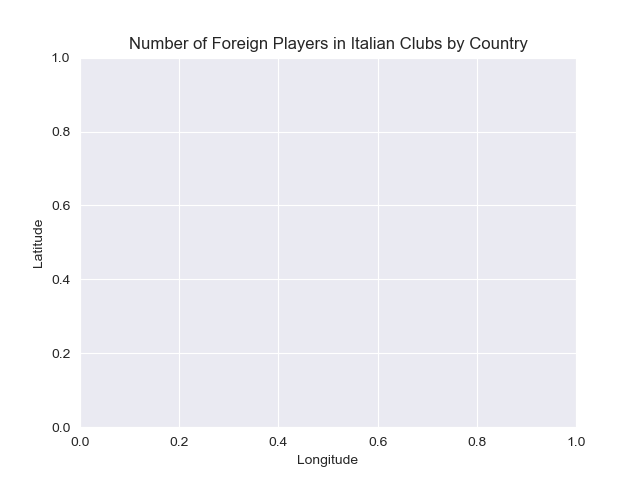

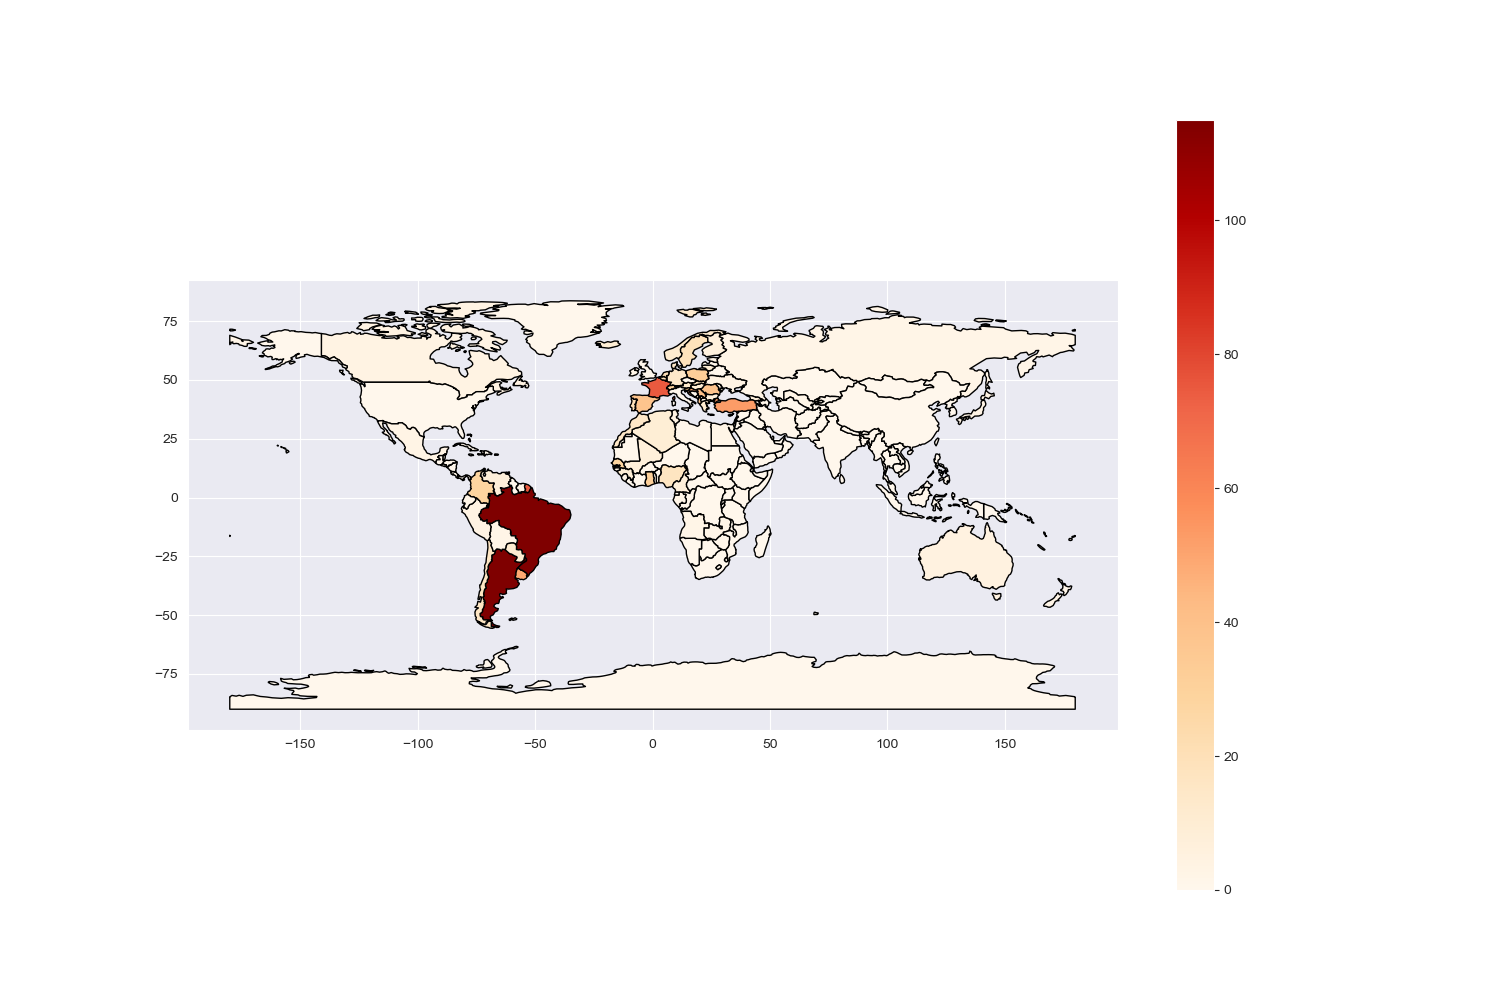

In [42]:
# Aggregating the number of players from each country
players_by_country = foreign_players_in_italy['country_of_citizenship'].value_counts().reset_index()
players_by_country.columns = ['Country', 'Number of Players']

# Loading the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging the players by country data with the world map data
world = world.merge(players_by_country, how="left", left_on="name", right_on="Country")

# Replacing NaN values with 0 for countries with no players
world['Number of Players'] = world['Number of Players'].fillna(0)

# Plotting
plt.title('Number of Foreign Players in Italian Clubs by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
world.plot(column='Number of Players', cmap='OrRd', legend=True, edgecolor='black', figsize=(15, 10))





## Analyzing Total Goals by Country
We will now shift our focus to analyze the total goals scored by players from each country, providing insights into the goal-scoring impact of these players globally.


/var/folders/q6/bw_h2w9d6js7mn__0srnx8rm0000gn/T/ipykernel_4077/2007147258.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




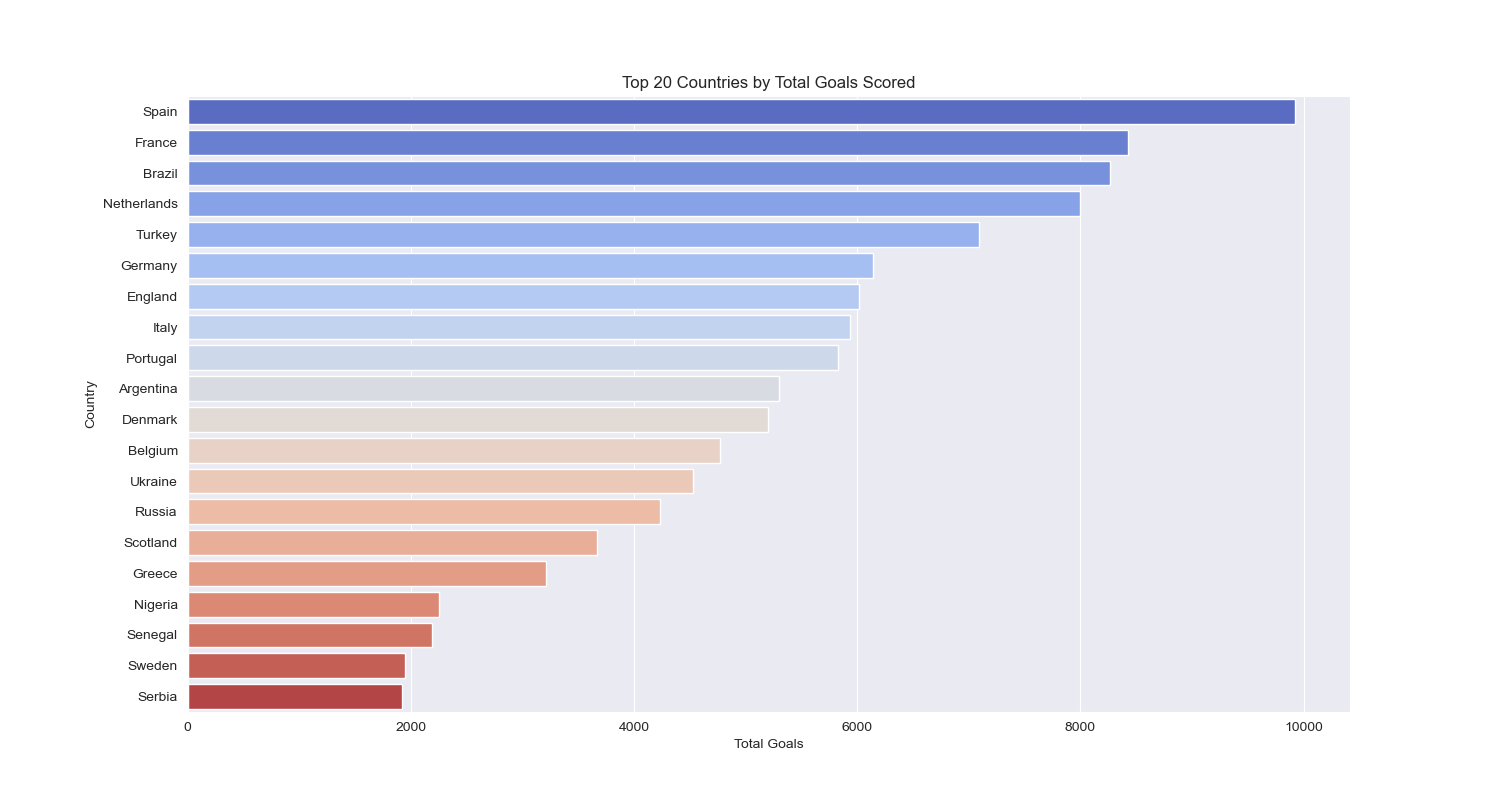

In [43]:
# Merging player goal data with their nationality
player_goals = appearances_df.groupby('player_id')['goals'].sum().reset_index()
total_goals_by_country = players_df.merge(player_goals, left_on='_id', right_on='player_id')

# Aggregating total goals scored by players from each country
total_goals_by_country = total_goals_by_country.groupby('country_of_citizenship')['goals'].sum().reset_index()
total_goals_by_country.columns = ['Country', 'Total Goals']

# Sorting for the top countries
top_goals_by_country = total_goals_by_country.sort_values(by='Total Goals', ascending=False).head(20)

# Creating a bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Total Goals', y='Country', data=top_goals_by_country, palette='coolwarm')
plt.title('Top 20 Countries by Total Goals Scored')
plt.xlabel('Total Goals')
plt.ylabel('Country')
plt.show()


# Conclusion
This analysis provides a fascinating look at the influence of foreign players in Italian football, highlighting their origins and goal-scoring contributions. It underscores the global nature of the sport and the significant impact these players have on the international football landscape.
